# How to use igv-notebook in jupyter

This notebook will use igv-notebooks (https://github.com/igvteam/igv-notebook) in the GCP provided Python3 kernels. The study being used is a WGBS methylation GEO study study accession GSE188157 (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE188157). This is a mouse study with male and female BRCA KO and wildtype samples from liver. 

Bismark coverage files were taken tranformed into BedGraph format(4 columns from 6 columns) and input into an interactive IGV browser in the notebook. We will use mm10 as reference and also load an annotation track from UCSC genome browser annotations FTP (https://hgdownload.soe.ucsc.edu/gbdb/mm10/). 

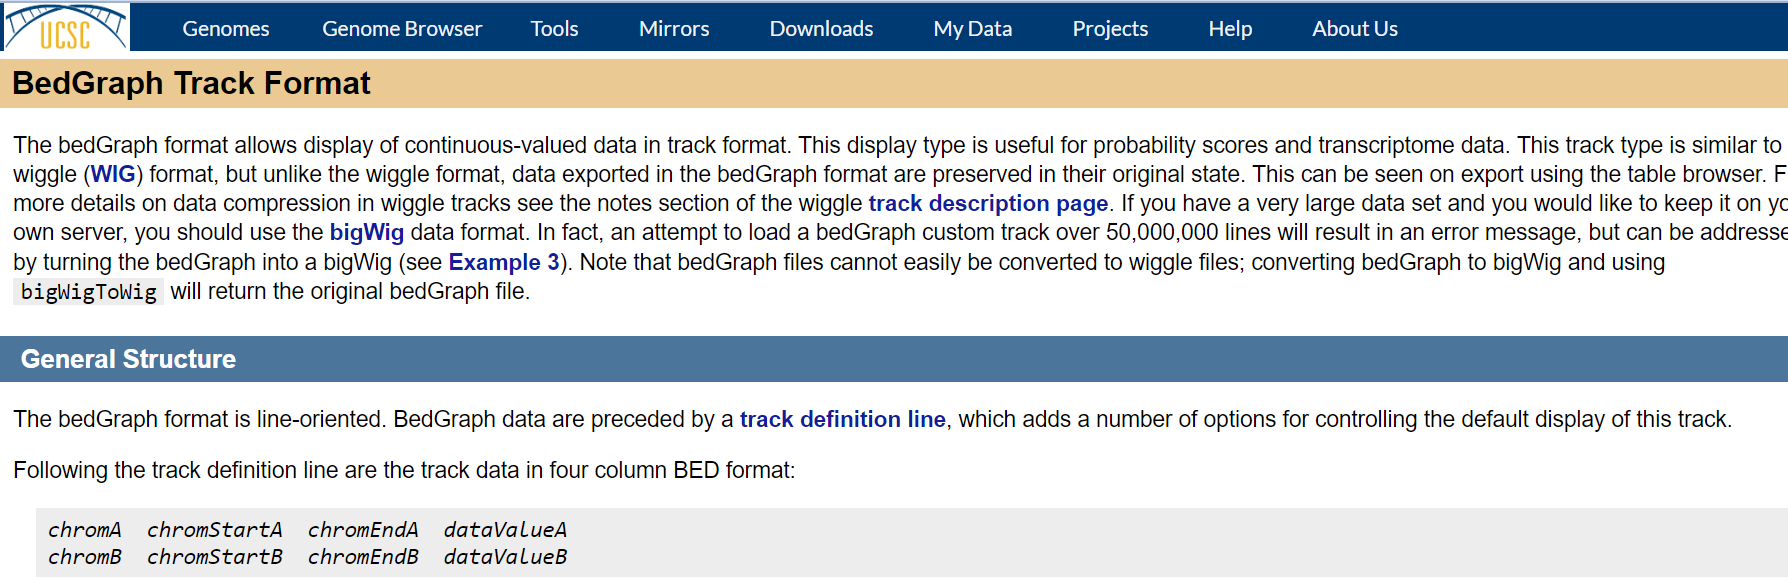

In [1]:
#We will use BedGraph format and convert methylation coverage files into BedGraph format
from IPython.display import Image
Image("/home/jupyter/img/BedGraph.PNG")

### Below we are:
1. Making our directory to store our data
2. Downloading data
3. Uncompressing data

In [1]:
!mkdir GSE188157_example

In [2]:
#Mouse WGBS Study
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE188nnn/GSE188157/suppl/GSE188157_RAW.tar -P ~/GSE188157_example

--2022-09-07 02:15:20--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE188nnn/GSE188157/suppl/GSE188157_RAW.tar
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632084480 (603M) [application/x-tar]
Saving to: ‘/home/jupyter/GSE188157_example/GSE188157_RAW.tar’

GSE188157_RAW.tar   100%[===================>] 602.80M  50.9MB/s    in 13s     

2022-09-07 02:15:33 (45.6 MB/s) - ‘/home/jupyter/GSE188157_example/GSE188157_RAW.tar’ saved [632084480/632084480]



In [12]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE188nnn/GSE188157/matrix/GSE188157_series_matrix.txt.gz -P ~/GSE188157_example

--2022-09-07 02:33:00--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE188nnn/GSE188157/matrix/GSE188157_series_matrix.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 165.112.9.230, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3614 (3.5K) [application/x-gzip]
Saving to: ‘/home/jupyter/GSE188157_example/GSE188157_series_matrix.txt.gz’

GSE188157_series_ma 100%[===================>]   3.53K  --.-KB/s    in 0s      

2022-09-07 02:33:00 (124 MB/s) - ‘/home/jupyter/GSE188157_example/GSE188157_series_matrix.txt.gz’ saved [3614/3614]



In [4]:
!tar -xvf /home/jupyter/GSE188157_example/GSE188157_RAW.tar -C /home/jupyter/GSE188157_example/

GSM5671130_SEQ0032_3_3-MUP1_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671131_SEQ0032_1_4-MUP2_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671132_SEQ0032_1_3-MUP3_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671133_SEQ0032_2_3-MUP4_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671134_SEQ0032_1_6-MUP5_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671135_SEQ0032_1_5-MUP6_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671136_SEQ0032_4_3-MUP7_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671137_SEQ0032_3_5-MUP8_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671138_SEQ0032_4_5-MUP10_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671139_SEQ0032_4_4-MUP11_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671140_SEQ0032_2_6-MUP12_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671141_SEQ0032_3_4-MUP13_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671142_SEQ0032_3_2-MUP14_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671143_SEQ0032_2_1-MUP15_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671144_SEQ0032_1_1-MUP16_GRCm38_bismark_bt2_pe.bismark.cov.gz
GSM5671145_SEQ0032

In [5]:
!gunzip /home/jupyter/GSE188157_example/*.gz

In [6]:
!ls /home/jupyter/GSE188157_example/

GSE188157_RAW.tar
GSM5671130_SEQ0032_3_3-MUP1_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671131_SEQ0032_1_4-MUP2_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671132_SEQ0032_1_3-MUP3_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671133_SEQ0032_2_3-MUP4_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671134_SEQ0032_1_6-MUP5_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671135_SEQ0032_1_5-MUP6_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671136_SEQ0032_4_3-MUP7_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671137_SEQ0032_3_5-MUP8_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671138_SEQ0032_4_5-MUP10_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671139_SEQ0032_4_4-MUP11_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671140_SEQ0032_2_6-MUP12_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671141_SEQ0032_3_4-MUP13_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671142_SEQ0032_3_2-MUP14_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671143_SEQ0032_2_1-MUP15_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671144_SEQ0032_1_1-MUP16_GRCm38_bismark_bt2_pe.bismark.cov
GSM5671145_SEQ0032_4_1-MUP17_GRCm38_bismark_b

In [7]:
!head /home/jupyter/GSE188157_example/GSM5671130_SEQ0032_3_3-MUP1_GRCm38_bismark_bt2_pe.bismark.cov

2	3052121	3052121	70.7317073170732	29	12
2	3052122	3052122	61.5384615384615	8	5
2	3052312	3052312	0	0	1
2	3052401	3052401	71.4285714285714	30	12
2	3052402	3052402	76.9230769230769	10	3
2	3052713	3052713	84.6153846153846	44	8
2	3052714	3052714	100	21	0
2	3052723	3052723	52.8301886792453	28	25
2	3052724	3052724	38.0952380952381	8	13
2	3054445	3054445	100	1	0


### Now we will use a shell script to convert each .cov file to a .bedgraph

This step is specific to bismark coverage files that are similar to bed files...but not exactly. SO, we are chopping off columns 5 and 6 from the Bismark.cov files. If you are using BED, BedGraph, BAM, or some other track format you should already be in the format that you need. 

To convert the .cov files, make the script below and save it in /home/jupyter

In [8]:
!cat CovToBedGraph.sh

#!/bin/bash
for file in $(ls /home/jupyter/GSE188157_example/*.cov)
do
   cut -d$'\t' -f1-4 $file > ${file/.cov/.bedgraph} 
done


In [9]:
!bash CovToBedGraph.sh

In [10]:
!head /home/jupyter/GSE188157_example/GSM5671130_SEQ0032_3_3-MUP1_GRCm38_bismark_bt2_pe.bismark.bedgraph

2	3052121	3052121	70.7317073170732
2	3052122	3052122	61.5384615384615
2	3052312	3052312	0
2	3052401	3052401	71.4285714285714
2	3052402	3052402	76.9230769230769
2	3052713	3052713	84.6153846153846
2	3052714	3052714	100
2	3052723	3052723	52.8301886792453
2	3052724	3052724	38.0952380952381
2	3054445	3054445	100


In [13]:
#What genome build did this study use?
!gunzip /home/jupyter/GSE188157_example/GSE188157_series_matrix.txt.gz
!grep 'Genome_build' /home/jupyter/GSE188157_example/GSE188157_series_matrix.txt

!Sample_data_processing	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"	"Genome_build: GRCm38.p6"


### You can store reference files locally or point to URLs with igv-notebook

Below we are downloading some reference files and storing them locally in our notebook. If you have some custom reference you'de like to use you could similarly create a folder for them and upload them. Alternatively, as we've seen in previous workshops you can store files in Google Cloud Storage buckets and either mount the bucket with gcsfuse or copy them in with gsutil commands. 

In [14]:
!mkdir Reference_mm10

In [15]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/635/GCF_000001635.26_GRCm38.p6/GCF_000001635.26_GRCm38.p6_genomic.fna.gz -P Reference_mm10/

--2022-09-07 02:35:49--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/635/GCF_000001635.26_GRCm38.p6/GCF_000001635.26_GRCm38.p6_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.230, 130.14.250.7, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 860920141 (821M) [application/x-gzip]
Saving to: ‘Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fna.gz’

GCF_000001635.26_GR 100%[===================>] 821.04M  41.2MB/s    in 26s     

2022-09-07 02:36:16 (31.3 MB/s) - ‘Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fna.gz’ saved [860920141/860920141]



In [16]:
!gunzip Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fna.gz

In [17]:
!mv Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fna Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fa

In [18]:
!conda install -c bioconda samtools -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    certifi-2022.6.15          |     pyhd8ed1ab_1         154 KB  conda-forge
    conda-4.14.0               |   py37h89c1867_0        1010 KB  conda-forge
    curl-7.83.1                |       h7bff187_0          89 KB  conda-forge
    keyutils-1.6.1             |       h166bdaf_0         115 KB  conda-forge
    krb5-1.19.3                |       h3790be6_0         1.4 MB  conda-forge
    libcurl-7.83.1             |       h7bff187_0         342 KB  conda-forge
    libedit-3.1.20191231       |       he28a2e2_2         121 KB  conda-forge
    libev-4.33                 |       h516909a_1         104 KB  conda-forge
    libnghttp2-1.47.0        

In [19]:
!samtools faidx Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fa

### Install igv-notebook and initialize

The kernel we are using is the default Python 3 (ipykernel) VertexAI kernel. We are installing igv-notebook with pip below.

In [20]:
#install IGV on managed notebook
!pip install --user igv-notebook

In [17]:
import igv_notebook

igv_notebook.init()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Browser 'b1' shows the human reference that Broad stores a copy of. 

In [18]:
b1 = igv_notebook.Browser(
    {
        "genome": "hg19",
        "locus": "chr22:24,376,166-24,376,456"
    }
)

<IPython.core.display.Javascript object>

#### Use this command to make b1 static prior to exporting your notebook

In [19]:
b1.to_svg()

<IPython.core.display.Javascript object>

#### Browser 'b2' shows using the local reference files we downloaded earlier

In [20]:
b2 = igv_notebook.Browser(
    {
        "reference": {
            "id": "mm10_custom",
            "name": "mm10_custom",
            "fastaURL": "Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fa",
            "indexURL": "Reference_mm10/GCF_000001635.26_GRCm38.p6_genomic.fa.fai",
        },
        "locus": "NT_080256.1:71,136-71,205"
    })

<IPython.core.display.Javascript object>

#### Browser 'b3' shows a mouse reference. We'll move forward with adding tracks to this reference since our study has mm10 coverage files produced by Bismark.

In [21]:
#open interactive genome browser in notebook
b3 = igv_notebook.Browser(
    {
        "genome": "mm10",
        "locus": "chr11:101,479,688-101,606,077"
    }
)

#brca1 chr11:101,479,688-101,606,077
#pax9 chr12:56691693-56712824


<IPython.core.display.Javascript object>

In [22]:
#Add local file as a track
b3.load_track(
{
        "name": "KO",
        "url": "GSE188157_example/GSM5671130_SEQ0032_3_3-MUP1_GRCm38_bismark_bt2_pe.bismark.bedgraph",
        "format": "bedgraph",
        "type": "wig",
        "color":"red",
        "height": 25
    })

<IPython.core.display.Javascript object>

In [23]:
b3.load_track(
{
        "name": "WT",
        "url": "GSE188157_example/GSM5671131_SEQ0032_1_4-MUP2_GRCm38_bismark_bt2_pe.bismark.bedgraph",
        "format": "bedgraph",
        "type": "wig",
        "color": "blue",
        "height": 25
    })

<IPython.core.display.Javascript object>

In [24]:
#Add annotation track from UCSC website
b3.load_track(
{
        "name": "UCSC_encode3_chromHmm_mm10_Liver_P0",
        "url": "https://hgdownload.soe.ucsc.edu/gbdb/mm10/encode3/chromHmm/encode3RenChromHmmLiverP0.bb",
        "format": "bigbed",
        "type": "annotation",
        "height": 100
    })

<IPython.core.display.Javascript object>

In [25]:
b3.to_svg()

<IPython.core.display.Javascript object>

#### Learn about the different track types in IGV
https://github.com/igvteam/igv.js/wiki/Tracks-2.0